In [1]:
import pandas as pd
# ---- RECOMMENDED: Auto-detect based on your file extension ----
file_path = '/Users/lakshita/Desktop/bbo_streamlit_app/data/detections_master.csv'   

if file_path.endswith(".csv"):
    detections_master = pd.read_csv(file_path)
elif file_path.endswith((".xlsx", ".xls")):
    detections_master = pd.read_excel(file_path)
else:
    raise ValueError("Unsupported file format — use .csv or .xlsx")

print("Loaded shape:", detections_master.shape)
detections_master.head()

Loaded shape: (102678, 57)


,hitID,runID,batchID,ts,tsCorrected,DATE,TIME,sig,sigsd,noise,...,angle,prev_angle,prev_snr,dir_change,snr_spike,night_move,freq_drift,dayofyear,migration_activity,days_since_deployment
0,2.472887e+10,655361923.0,13702736.0,1.695353e+09,1.695353e+09,2023-09-21 21:30:15.689,2023-09-21 21:30:15.689,-41.6397,1.3105,-74.5216,...,NaN,0.0,0.424225,1,0,1,3.8781,265,1,0
1,2.472887e+10,655361920.0,13702736.0,1.695353e+09,1.695353e+09,2023-09-21 21:30:15.689,2023-09-21 21:30:15.689,-46.0502,11.0831,-77.9732,...,215.0,NaN,0.441240,1,0,1,3.9024,265,1,0
2,2.472887e+10,655361921.0,13702736.0,1.695353e+09,1.695353e+09,2023-09-21 21:30:15.689,2023-09-21 21:30:15.689,-45.9465,6.0365,-76.5572,...,135.0,215.0,0.409410,1,0,1,3.8833,265,1,0
3,2.472887e+10,655361922.0,13702736.0,1.695353e+09,1.695353e+09,2023-09-21 21:30:15.689,2023-09-21 21:30:15.689,-46.2269,1.8556,-77.1633,...,0.0,135.0,0.399841,1,0,1,3.9121,265,1,0
4,2.472887e+10,655361920.0,13702736.0,1.695353e+09,1.695353e+09,2023-09-21 21:30:47.385,2023-09-21 21:30:47.385,-50.7188,2.6664,-80.0965,...,215.0,0.0,0.400921,1,0,1,3.8992,265,1,0


In [2]:
detections_master.columns

Index(['hitID', 'runID', 'batchID', 'ts', 'tsCorrected', 'DATE', 'TIME', 'sig',
       'sigsd', 'noise', 'snr', 'freq', 'freqsd', 'slop', 'burstSlop',
       'motusTagID', 'port', 'antBearing', 'runLen', 'motusFilter', 'tagID',
       'source_sheet', 'datetime', 'manufacturer', 'model', 'lifespan',
       'nomFreq', 'dtStart', 'tsStart', 'latitude', 'longitude', 'sex', 'age',
       'weight', 'wing', 'speciesID', 'speciesName', 'motusEnglishName',
       'bearing_deg', 'direction_str', 'snr_missing', 'hour', 'date', 'day',
       'month', 'weekday', 'port_name', 'angle', 'prev_angle', 'prev_snr',
       'dir_change', 'snr_spike', 'night_move', 'freq_drift', 'dayofyear',
       'migration_activity', 'days_since_deployment'],
      dtype='object')

In [3]:
detections_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102678 entries, 0 to 102677
Data columns (total 57 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   hitID                  102678 non-null  float64
 1   runID                  102678 non-null  float64
 2   batchID                102678 non-null  float64
 3   ts                     102678 non-null  float64
 4   tsCorrected            102678 non-null  float64
 5   DATE                   102678 non-null  object 
 6   TIME                   102678 non-null  object 
 7   sig                    102678 non-null  float64
 8   sigsd                  102678 non-null  float64
 9   noise                  102678 non-null  float64
 10  snr                    101931 non-null  float64
 11  freq                   102678 non-null  float64
 12  freqsd                 102678 non-null  float64
 13  slop                   102678 non-null  float64
 14  burstSlop              102678 non-nu

#   1. MODEL A — Migration Activity Prediction (Classification)
    Using merged dataset: detections_master

In [4]:
print(detections_master["migration_activity"].value_counts())


migration_activity
1    77708
0    24970
Name: count, dtype: int64



Starting FINAL MODEL A training...



/var/folders/9m/k0_jzfpj4lbfdzwbg17jtqgr0000gn/T/ipykernel_12211/4242698586.py:56: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`




Training Logistic Regression...


/Users/lakshita/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



Logistic Regression — ACC: 0.8339, F1: 0.8812, AUC: 0.8908

Training Random Forest...
Random Forest — ACC: 0.9605, F1: 0.9743, AUC: 0.9841

Training XGBoost...
XGBoost — ACC: 0.9577, F1: 0.9724, AUC: 0.9856

Model Comparison:
                 Model  Accuracy        F1       AUC
0  Logistic Regression  0.833901  0.881228  0.890836
1        Random Forest  0.960508  0.974253  0.984128
2              XGBoost  0.957733  0.972420  0.985630


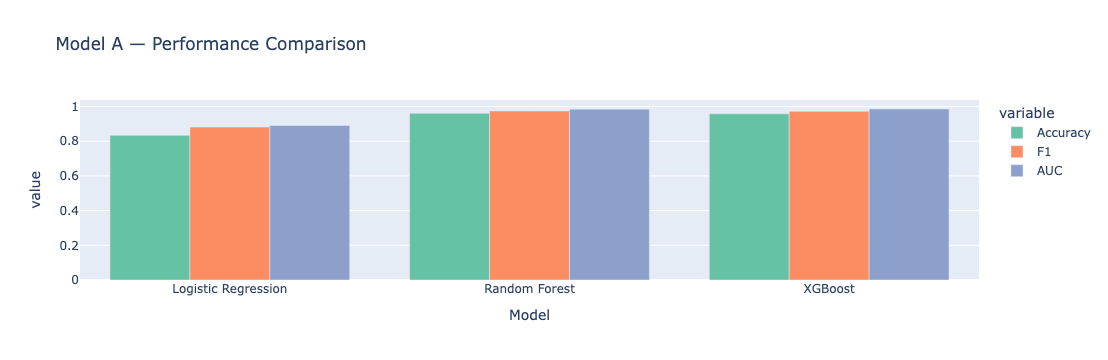


🔥 BEST MODEL SELECTED: XGBoost

Saved final model as modelA_final.pkl
Saved feature list as modelA_features.pkl


In [24]:
# ============================================================
# MODEL A — Migration Activity Prediction (Final Version)
# With Multiple Models, Comparison, Visualization & Best Model Selection
# ============================================================

import pandas as pd
import numpy as np
import joblib

from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, f1_score, roc_auc_score,
    classification_report, confusion_matrix
)

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

import plotly.express as px
import plotly.graph_objects as go

print("\nStarting FINAL MODEL A training...\n")

# ------------------------------------------------------------
# STEP 1 — Load Data
# ------------------------------------------------------------
df = detections_master.copy()

df["datetime"] = pd.to_datetime(df["datetime"], errors="coerce")
df = df.dropna(subset=["datetime"])

# ------------------------------------------------------------
# STEP 2 — Remove Leakage Columns
# ------------------------------------------------------------
leak_cols = ["dir_change", "snr_spike", "night_move"]
df = df.drop(columns=leak_cols, errors="ignore")

# ------------------------------------------------------------
# STEP 3 — Define Features
# ------------------------------------------------------------
features_A = [
    "snr", "sig", "sigsd", "noise",
    "freq", "freqsd", "freq_drift",
    "runLen", "motusFilter",
    "port", "angle", "bearing_deg",
    "hour", "day", "month", "weekday", "dayofyear",
    "sex", "age", "weight", "wing"
]

X = df[features_A].copy()
y = df["migration_activity"]

# Encode sex
sex_map = {"F": 0, "M": 1, "U": np.nan}
X["sex"] = X["sex"].replace(sex_map)

# Encode age
age_map = {"ad": 1, "imm": 0, "unk": np.nan}
X["age"] = X["age"].replace(age_map)

# Convert to numeric
X = X.apply(pd.to_numeric, errors="coerce").fillna(0)

# ------------------------------------------------------------
# STEP 4 — Train/Test Split
# ------------------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

# ------------------------------------------------------------
# STEP 5 — Define 3 Models
# ------------------------------------------------------------
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, class_weight="balanced"),
    "Random Forest": RandomForestClassifier(n_estimators=300, class_weight="balanced", random_state=42),
    "XGBoost": XGBClassifier(
        n_estimators=300, learning_rate=0.05, max_depth=6,
        subsample=0.8, eval_metric="logloss", random_state=42
    )
}

# ------------------------------------------------------------
# STEP 6 — Train, Evaluate & Store Metrics
# ------------------------------------------------------------
results = []
predictions = {}

for name, model in models.items():
    print(f"\nTraining {name}...")
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    proba = model.predict_proba(X_test)[:, 1]

    acc = accuracy_score(y_test, preds)
    f1 = f1_score(y_test, preds)
    auc = roc_auc_score(y_test, proba)

    print(f"{name} — ACC: {acc:.4f}, F1: {f1:.4f}, AUC: {auc:.4f}")

    results.append([name, acc, f1, auc])
    predictions[name] = preds

# Convert results to DataFrame
results_df = pd.DataFrame(results, columns=["Model", "Accuracy", "F1", "AUC"])
print("\nModel Comparison:")
print(results_df)

# ------------------------------------------------------------
# STEP 7 — Plot Performance Comparison
# ------------------------------------------------------------
fig = px.bar(
    results_df,
    x="Model", y=["Accuracy", "F1", "AUC"],
    barmode="group",
    title="Model A — Performance Comparison",
    color_discrete_sequence=px.colors.qualitative.Set2
)
fig.show()

# ------------------------------------------------------------
# STEP 8 — Select Best Model (based on AUC)
# ------------------------------------------------------------
best_model_name = results_df.sort_values("AUC", ascending=False).iloc[0]["Model"]
best_model = models[best_model_name]

print(f"\n🔥 BEST MODEL SELECTED: {best_model_name}\n")

# Retrain on full dataset
best_model.fit(X, y)

# ------------------------------------------------------------
# STEP 9 — Save Final Model + Features
# ------------------------------------------------------------
joblib.dump(best_model, "modelA_final.pkl")
joblib.dump(features_A, "modelA_features.pkl")

print("Saved final model as modelA_final.pkl")
print("Saved feature list as modelA_features.pkl")



In [20]:
# ------------------------------------------------------------
# STEP 10 — Classification Report (from best model)
# ------------------------------------------------------------
final_preds = predictions[best_model_name]
print("\n=== Classification Report ===")
print(classification_report(y_test, final_preds))




=== Classification Report ===
              precision    recall  f1-score   support

           0       0.95      0.87      0.91      4994
           1       0.96      0.98      0.97     15542

    accuracy                           0.96     20536
   macro avg       0.95      0.93      0.94     20536
weighted avg       0.96      0.96      0.96     20536



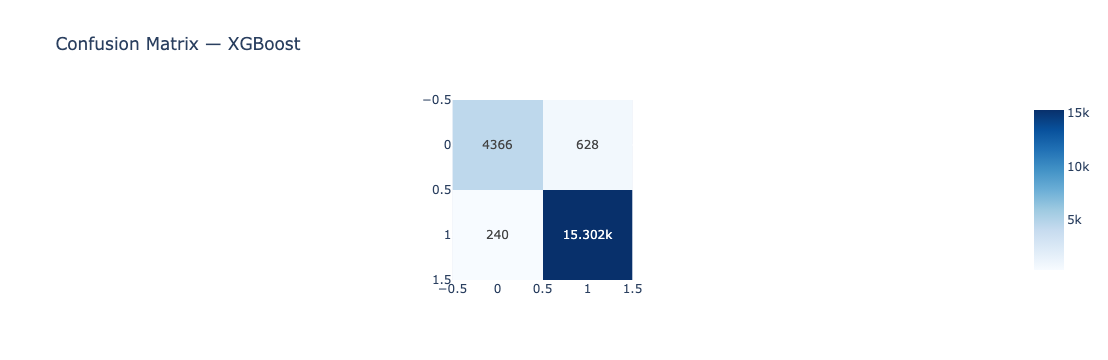

In [21]:
# ------------------------------------------------------------
# STEP 11 — Confusion Matrix (Plotly)
# ------------------------------------------------------------
cm = confusion_matrix(y_test, final_preds)
cm_fig = px.imshow(
    cm,
    text_auto=True,
    color_continuous_scale="Blues",
    title=f"Confusion Matrix — {best_model_name}"
)
cm_fig.show()

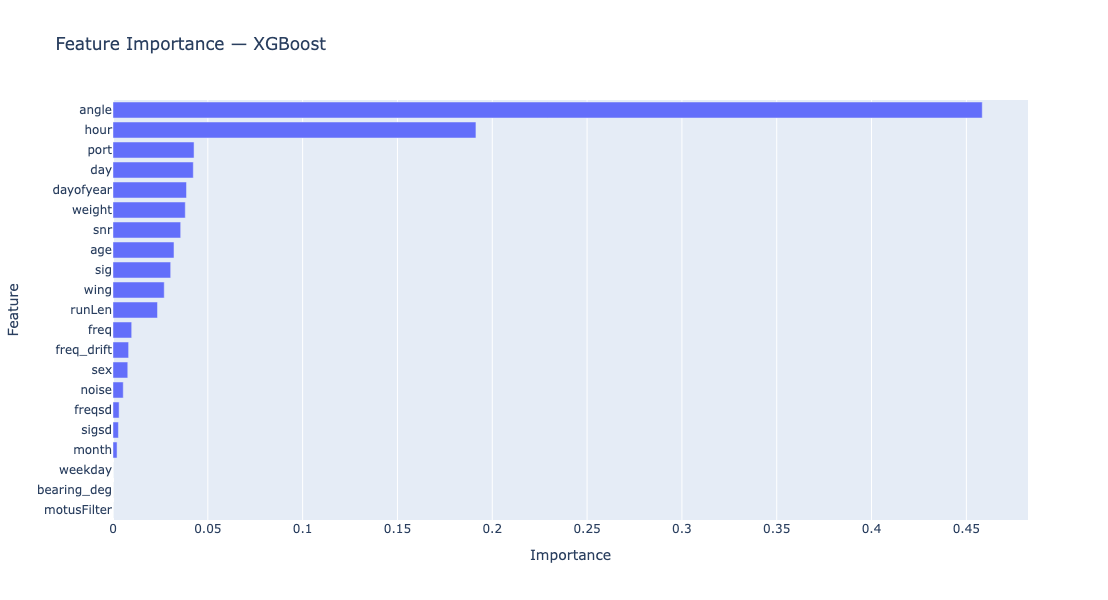

Feature importance saved as modelA_feature_importance.csv

MODEL A Training Completed Successfully.



In [22]:
# ------------------------------------------------------------
# STEP 12 — Feature Importance (for RF or XGB)
# ------------------------------------------------------------
if best_model_name in ["Random Forest", "XGBoost"]:
    importances = best_model.feature_importances_
    fi_df = pd.DataFrame({"Feature": features_A, "Importance": importances})
    fi_df = fi_df.sort_values("Importance", ascending=True)

    fig2 = px.bar(
        fi_df,
        x="Importance", y="Feature",
        title=f"Feature Importance — {best_model_name}",
        orientation="h",
        height=600
    )
    fig2.show()

    fi_df.to_csv("modelA_feature_importance.csv", index=False)
    print("Feature importance saved as modelA_feature_importance.csv")

print("\nMODEL A Training Completed Successfully.\n")

# Model B

In [12]:
# ============================================================
#   MODEL B — Detection Duration Modeling (Regression)
#   Using detections_master_clean
# ============================================================

import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor

print("Starting Detection Duration Regression (Model B)...")

# ------------------------------------------------------------
# STEP 1 — Load Data
# ------------------------------------------------------------
df = detections_master.copy()

# Ensure datetime columns are parsed
df["datetime"] = pd.to_datetime(df["datetime"], errors="coerce")
df["dtStart"] = pd.to_datetime(df["dtStart"], errors="coerce")

# ------------------------------------------------------------
# STEP 2 — Engineer Target Variable
# ------------------------------------------------------------
df["days_since_deployment"] = (
    df["datetime"] - df["dtStart"]
).dt.days

df = df[df["days_since_deployment"] >= 0]

# ------------------------------------------------------------
# STEP 3 — Feature Selection
# ------------------------------------------------------------
features = [
    "sex", "age", "weight", "wing", "speciesName",
    "manufacturer", "model", "lifespan", "nomFreq",
    "bearing_deg", "direction_str",
    "hour", "day", "month", "weekday", "dayofyear"
]

X = df[features]
y = df["days_since_deployment"]

# Identify categorical/numeric columns separately
categorical_cols = [
    "sex", "speciesName", "manufacturer", "model",
    "direction_str", "weekday"
]

numeric_cols = [
    "age", "weight", "wing", "lifespan", "nomFreq",
    "bearing_deg", "hour", "day", "month", "dayofyear"
]


# ------------------------------------------------------------
# STEP 4 — Preprocessing (OneHot + Scaling)
# ------------------------------------------------------------
preprocess = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols),
        ("num", StandardScaler(), numeric_cols)
    ]
)

# ------------------------------------------------------------
# STEP 5 — Train/Test Split
# ------------------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

# ------------------------------------------------------------
# STEP 6 — Train 3 Regression Models
# ------------------------------------------------------------

models = {
    "Random Forest": RandomForestRegressor(
        n_estimators=300,
        random_state=42
    ),

    "XGBoost": XGBRegressor(
        n_estimators=300,
        max_depth=6,
        learning_rate=0.05,
        subsample=0.8,
        random_state=42
    )
}


results = []

for name, model in models.items():
    pipe = Pipeline(steps=[("pre", preprocess), ("model", model)])
    pipe.fit(X_train, y_train)
    preds = pipe.predict(X_test)

    mae = mean_absolute_error(y_test, preds)
    mse = mean_squared_error(y_test, preds)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, preds)


    results.append([name, mae, rmse, r2])
    print(f"\n📌 {name} Performance")
    print(f"MAE: {mae:.3f}")
    print(f"RMSE: {rmse:.3f}")
    print(f"R²: {r2:.3f}")

# ------------------------------------------------------------
# STEP 7 — Results Summary Table
# ------------------------------------------------------------
import pandas as pd

results_df = pd.DataFrame(results, columns=["Model", "MAE", "RMSE", "R2"])
print("\n============================================================")
print("MODEL B — Results Summary")
print("============================================================")
print(results_df)


Starting Detection Duration Regression (Model B)...

📌 Random Forest Performance
MAE: 0.006
RMSE: 0.067
R²: 1.000

📌 XGBoost Performance
MAE: 0.029
RMSE: 0.090
R²: 1.000

MODEL B — Results Summary
           Model       MAE      RMSE        R2
0  Random Forest  0.006407  0.066741  0.999884
1        XGBoost  0.029451  0.090217  0.999788


In [13]:
# Pick the model with highest R²
results_df_sorted = results_df.sort_values(by="R2", ascending=False)
best_model_name = results_df_sorted.iloc[0]["Model"]

print(f"\n🔥 Best Model Selected: {best_model_name}")

best_model = models[best_model_name]

# Retrain pipeline on full dataset
final_pipe = Pipeline(steps=[("pre", preprocess), ("model", best_model)])
final_pipe.fit(X, y)



🔥 Best Model Selected: Random Forest


Pipeline(steps=[('pre',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['sex', 'speciesName',
                                                   'manufacturer', 'model',
                                                   'direction_str',
                                                   'weekday']),
                                                 ('num', StandardScaler(),
                                                  ['age', 'weight', 'wing',
                                                   'lifespan', 'nomFreq',
                                                   'bearing_deg', 'hour', 'day',
                                                   'month', 'dayofyear'])])),
                ('model',
                 RandomForestRegressor(n_estimators=300, random_state=42))])

In [14]:
import joblib
joblib.dump(final_pipe, "modelB_duration.pkl")

print("\nModel B saved successfully as modelB_duration.pkl")



Model B saved successfully as modelB_duration.pkl


# Model c — SNR Regression (Nanotag Performance)

This model predicts **SNR** using temporal + directional factors:

- days_since_deployment  
- bearing_deg  
- month  
- weekday  
- motusFilter  

This avoids leakage and uses fields guaranteed to exist in `detections_master`.


In [15]:
# ============================================================
# MODEL C — SNR Regression (Nanotag Performance)
# ============================================================

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib

print("\nStarting MODEL C training...\n")

# ------------------------------------------------------------
# STEP 1 — Load Data
# ------------------------------------------------------------
df = detections_master.copy()

df["datetime"] = pd.to_datetime(df["datetime"], errors="coerce")
df["dtStart"] = pd.to_datetime(df["dtStart"], errors="coerce")
df = df.dropna(subset=["datetime", "snr"])

# ------------------------------------------------------------
# STEP 2 — Define Features & Target
# ------------------------------------------------------------
features_C = [
    "days_since_deployment",
    "bearing_deg", "port",
    "hour", "day", "month", "weekday", "dayofyear",
    "freq", "freqsd", "freq_drift",
    "manufacturer", "model", "lifespan", "nomFreq",
    "age", "sex", "weight", "wing"
]

X = df[features_C].copy()
y = df["snr"].astype(float)

# ------------------------------------------------------------
# STEP 3 — Encode Categoricals
# ------------------------------------------------------------
# sex
sex_map = {"F": 0, "M": 1, "U": np.nan}
X["sex"] = X["sex"].replace(sex_map)

# age
age_map = {"ad": 1, "imm": 0, "unk": np.nan}
X["age"] = X["age"].replace(age_map)

# manufacturer & model
X["manufacturer"] = X["manufacturer"].astype("category").cat.codes
X["model"] = X["model"].astype("category").cat.codes

# convert to numeric
X = X.apply(pd.to_numeric, errors="coerce").fillna(0)

# ------------------------------------------------------------
# STEP 4 — Train/Test Split
# ------------------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ------------------------------------------------------------
# STEP 5 — MODELS
# ------------------------------------------------------------
models = {
    "Random Forest": RandomForestRegressor(
        n_estimators=300,
        random_state=42
    )
}

# Optional XGBoost (if installed)
try:
    from xgboost import XGBRegressor
    models["XGBoost"] = XGBRegressor(
        n_estimators=300,
        learning_rate=0.05,
        max_depth=6,
        subsample=0.8,
        random_state=42
    )
except:
    print("XGBoost not installed — skipping")

# ------------------------------------------------------------
# STEP 6 — Evaluate
# ------------------------------------------------------------
results = []

for name, model in models.items():
    print(f"\nTraining {name}...")
    model.fit(X_train, y_train)
    preds = model.predict(X_test)

    mae = mean_absolute_error(y_test, preds)
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    r2 = r2_score(y_test, preds)

    print(f"{name} Performance")
    print("MAE:", round(mae, 4))
    print("RMSE:", round(rmse, 4))
    print("R²:", round(r2, 4))

    results.append([name, mae, rmse, r2])


Starting MODEL C training...



/var/folders/9m/k0_jzfpj4lbfdzwbg17jtqgr0000gn/T/ipykernel_12211/747160734.py:43: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`




Training Random Forest...
Random Forest Performance
MAE: 0.0307
RMSE: 0.0479
R²: 0.8486

Training XGBoost...
XGBoost Performance
MAE: 0.0366
RMSE: 0.052
R²: 0.8218


In [16]:
# Convert results list to DataFrame
results_df = pd.DataFrame(results, columns=["Model", "MAE", "RMSE", "R2"])

# Pick model with highest R² score
best_model_name = results_df.sort_values("R2", ascending=False).iloc[0]["Model"]

print(f"\n🔥 BEST MODEL SELECTED FOR MODEL C: {best_model_name}\n")

# Retrieve the trained model object
best_model = models[best_model_name]

# Save final chosen model
joblib.dump(best_model, "modelC_snr_final.pkl")
print("Final Model saved as → modelC_snr_final.pkl")



🔥 BEST MODEL SELECTED FOR MODEL C: Random Forest

Final Model saved as → modelC_snr_final.pkl
